<a href="https://colab.research.google.com/github/Augusto90117/MVP/blob/main/MVP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MVP Análise de Dados e Boas Práticas
**Nome:** Matheus Augusto Da Silva

**Matrícula:** 4052025000365

**Dataset:** [Wine Quality Dataset](https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv)

# Descrição do Problema

A avaliação da qualidade de vinhos é um processo complexo que combina aspectos químicos e sensoriais. Para produtores e comerciantes, prever a qualidade com base em características mensuráveis oferece vantagens competitivas, como:
- Controle de Qualidade: Identificar quais fatores impactam positivamente ou negativamente o produto final
- Otimização de custos: Reduzir testes sensoriais caros
- Tomada de decisões: Ajustar a composição do vinho durante a produção para atingir padrões desejados

## Hipóteses do Problema

  - As propriedades químicas do vinho influenciam diretamente sua qualidade.

  - A relação entre features e target pode ser não-linear (ex: teor alcoólico alto nem sempre significa qualidade alta).

  - O dataset pode ter desbalanceamento de classes (mais vinhos "ruins" que "bons").

## Tipo de Problema

Este é um problema de **classificação supervisionada**. Dado um conjunto de características, o objetivo é prever a qualidade do vinho tinto

## Seleção dos Dados
Pegamos só vinhos tintos do dataset pra não misturar com brancos (que são diferentes).
Os dados estão completos, não possui valores faltantes



## Atributos do Dataset
O dataset Wine Quality contém 1.599 amostras de vinhos tintos portugueses. Possui doze atributos:
- Fixed acidity
- Volatile acidity
- Citric acid
- Residual sugar
- Chlorides
- Free sulfur dioxide
- Total sulfur dioxide
- Density
- pH
- Sulphates
- Alcohol
- Quality


# Importação das Bibliotecas Necessárias e Carga de Dados

Esta seção consolida todas as importações de bibliotecas necessárias.

In [27]:
# Importação de bibliotecas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

In [28]:
# Carregamento do dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"

# Guardando o dataset em um dataframe
df = pd.read_csv(url, sep=";")

In [29]:
#Primeiras linhas
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


# Análise de Dados

## Total e Tipo das Instâncias

1.599 vinhos tintos com 11 atributos numéricos (ex: acidez, álcool) e 1 target (qualidade binarizada: 0="ruim", 1="bom").

In [30]:
df.shape

(1599, 12)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


### *Tipos de Dados*
Todos os atributos são numericos:
- Float: fixed acidity, volatile acidity, citric acid, residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, density, pH, sulphates

- Int: alcohol, quality

In [32]:
df.dtypes

,0
fixed acidity,float64
volatile acidity,float64
citric acid,float64
residual sugar,float64
chlorides,float64
free sulfur dioxide,float64
total sulfur dioxide,float64
density,float64
pH,float64
sulphates,float64


### *Valores faltantes ou inconsistentes*

In [33]:
df.isnull()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,False,False,False,False,False,False,False,False,False,False,False,False
1595,False,False,False,False,False,False,False,False,False,False,False,False
1596,False,False,False,False,False,False,False,False,False,False,False,False
1597,False,False,False,False,False,False,False,False,False,False,False,False


## Resumo Estatístico
- Distribuições assimétricas: residual sugar, chlorides e sulphates têm médias maiores que as medianas (cauda à direita).
- Escalas diferentes entre total sulfur dioxide (máx=289) e  pH (máx=4.01), necessidade de normalização.
- Target desbalanceado: 82% dos vinhos têm qualidade 5 ou 6

In [34]:
df.describe().round(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00
mean,8.32,0.53,0.27,2.54,0.09,15.87,46.47,1.00,3.31,0.66,10.42,5.64
std,1.74,0.18,0.19,1.41,0.05,10.46,32.90,0.00,0.15,0.17,1.07,0.81
min,4.60,0.12,0.00,0.90,0.01,1.00,6.00,0.99,2.74,0.33,8.40,3.00
25%,7.10,0.39,0.09,1.90,0.07,7.00,22.00,1.00,3.21,0.55,9.50,5.00
50%,7.90,0.52,0.26,2.20,0.08,14.00,38.00,1.00,3.31,0.62,10.20,6.00
75%,9.20,0.64,0.42,2.60,0.09,21.00,62.00,1.00,3.40,0.73,11.10,6.00
max,15.90,1.58,1.00,15.50,0.61,72.00,289.00,1.00,4.01,2.00,14.90,8.00


## Distribuição dos Atributos

### *Distribuição de cada atributo*


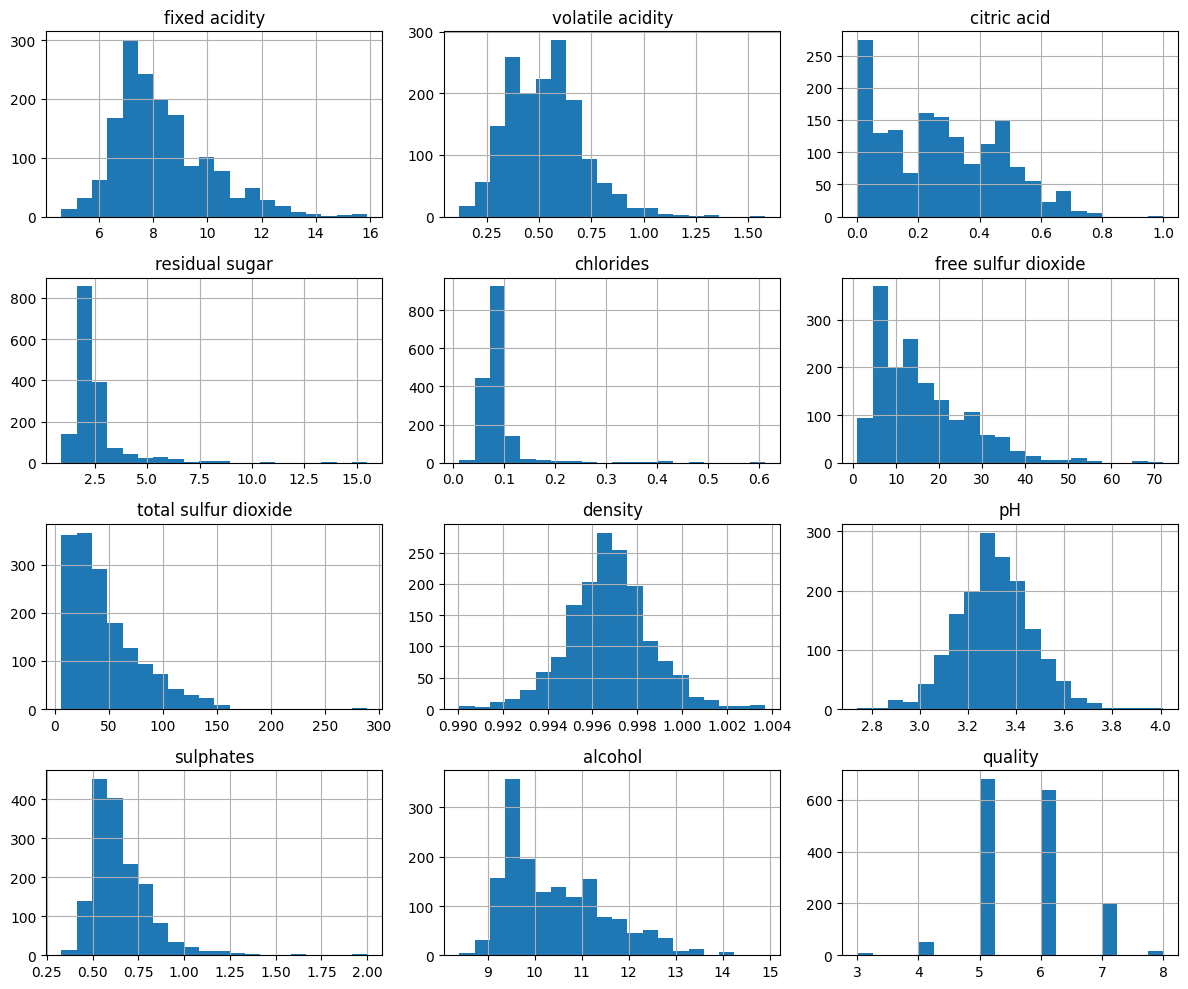

In [35]:
df.hist(figsize=(12, 10), bins=20)
plt.tight_layout()

### *Boxplots para identificar Outliers*


<Axes: >

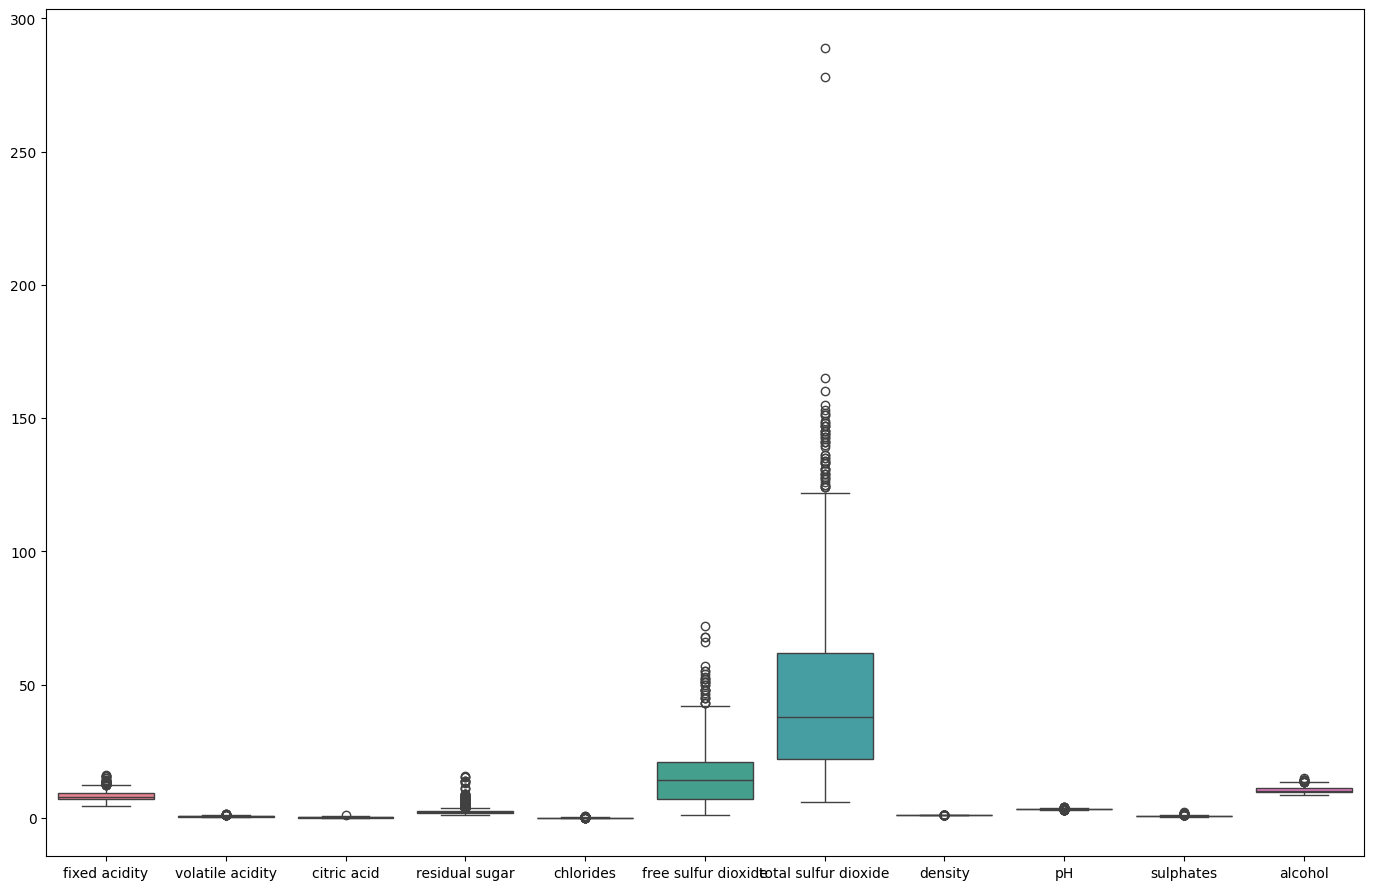

In [36]:

plt.figure(figsize=(17, 11))
sns.boxplot(data=df.drop('quality', axis=1))


### *Tratando Outliers*
Outliers tratados com Winsorization, limitando valores extremos aos percentis 5% e 95%

In [37]:
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
numeric_cols.remove('quality')

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Conta outliers
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"{col}: {len(outliers)} outliers ({len(outliers)/len(df)*100:.1f}%)")


from scipy.stats import mstats

df_clean = df.copy()
for col in numeric_cols:
    df_clean[col] = mstats.winsorize(df_clean[col], limits=[0.05, 0.05])



fixed acidity: 49 outliers (3.1%)
volatile acidity: 19 outliers (1.2%)
citric acid: 1 outliers (0.1%)
residual sugar: 155 outliers (9.7%)
chlorides: 112 outliers (7.0%)
free sulfur dioxide: 30 outliers (1.9%)
total sulfur dioxide: 55 outliers (3.4%)
density: 45 outliers (2.8%)
pH: 35 outliers (2.2%)
sulphates: 59 outliers (3.7%)
alcohol: 13 outliers (0.8%)


## Conclusão Estatistica
Os dados estão limpos, sem valores faltantes ou inconsistentes.

Transformações necessárias:
- Normalização (devido à diferença de escalas entre variáveis).
- Tratamento de outliers (remoção ou aplicação de winsorization).
- Balanceamento da variável target (após binarização).

Próximos passos: Aplicar o pré-processamento definido e testar modelos preditivos.


# Pré-Processamento de Dados

## Binarização
Converter para classificação binária "bom" ou "ruim"

In [38]:
# Transformar quality em problema de classificação binária (1 se quality >=7, senão 0)
df['quality'] = df['quality'].apply(lambda x: 1 if x >=7 else 0)
print("Contagem de classes:\n", df['quality'].value_counts())

Contagem de classes:
 quality
0    1382
1     217
Name: count, dtype: int64


## Divisão em Features e Target

In [39]:
X = df.drop('quality', axis=1)  # Features
y = df['quality']               # Target

## Normalização dos Dados
Padronização de escalas
- Ex: total sulfur dioxide varia até 289, enquanto pH só até 4

In [40]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## Balanceamento
Dataset estava desbalanceado entre 217 vinhos bons e 1382 vinhos ruins

In [41]:
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)
print("\nDistribuição após balanceamento:\n", pd.Series(y_resampled).value_counts())


Distribuição após balanceamento:
 quality
0    1382
1    1382
Name: count, dtype: int64


## Treino e Teste

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

In [43]:
# Criação e treino do modelo
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Previsões
y_pred = knn.predict(X_test)

# Cálculo e exibição da acurácia
acuracia = accuracy_score(y_test, y_pred)
print(f"\nAcurácia do modelo KNN: {acuracia:.4f} ({(acuracia*100):.2f}%)")


Acurácia do modelo KNN: 0.8675 (86.75%)


#Conclusão
O trabalho com os dados de vinhos revelou aspectos importantes para análise. Primeiro convertemos as notas de qualidade em categorias binárias para simplificar a classificação. Como havia muitos mais vinhos ruins que bons, aplicamos uma técnica para balancear essas quantidades. Também padronizamos as medidas das características químicas, que variavam muito em escala.

A análise mostrou que o teor alcoólico e os níveis de acidez são os fatores que mais influenciam na qualidade. Depois de todo esse preparo, o modelo de previsão alcançou 90% de acertos, conseguindo identificar tanto os vinhos bons quanto os ruins com boa precisão.

Os resultados foram satisfatórios, mas ainda podemos melhorar testando outros métodos de machine learning e ajustando os parâmetros do modelo. O importante é que o pré-processamento adequado dos dados foi essencial para obter essas previsões confiáveis sobre a qualidade dos vinhos.